In [1]:
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

img_height=128
img_width=416
# ckpt_file = './models/model-190532' # pretrained
ckpt_file = '../sfmLearner_checkpoints/noSSIM/model-198784' 
# ckpt_file = '../sfmLearner_checkpoints/SSIM_resnet/model-164618'
# ckpt_file = '../sfmLearner_checkpoints/ssim_finetune_notmuch change/model-192464'

# img_name = '../TrainingAndValData/SfMLearnerData/2011_09_26_drive_0032_sync_02/0000000001.jpg'
img_name = './misc/sample.png'
fh = open(img_name, 'rb')
I = pil.open(fh)
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
import scipy.misc

try:
    im = scipy.misc.imread('./misc/sample1.png')
except:
    continue

/home/gokul/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


FileNotFoundError: [Errno 2] No such file or directory: './misc/sample1.png'

In [9]:
dataset_dir = '../TrainingAndValData/Kitti_raw/'
with open('data/kitti/test_files_eigen.txt', 'r') as f:
    test_files = f.readlines()
    # test_files = [dataset_dir + t[:-1] for t in test_files]

In [47]:
test_files[]

TypeError: list indices must be integers or slices, not list

In [50]:


test_files = get_available_data(dataset_dir, test_files)

In [52]:
len(test_files1)

547

In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

51f1da5ac8>>: AssertionError: Bad argument number for Name: 3, expecting 4




In [3]:
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../sfmLearner_checkpoints/noSSIM/model-198784


In [10]:
pred['depth'].min()

1.349911

Populating the interactive namespace from numpy and matplotlib


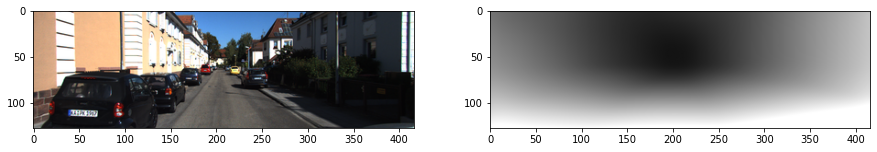

In [4]:
%pylab inline
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow((normalize_depth_for_display(pred['depth'][0,:,:,0])))


Populating the interactive namespace from numpy and matplotlib


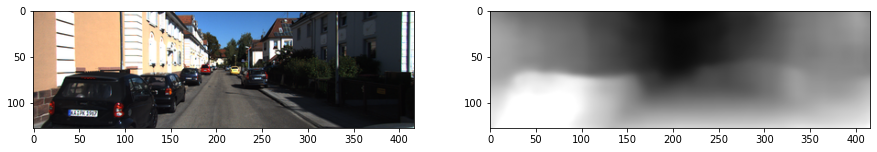